In [138]:
import numpy as np
import matplotlib.pyplot as plt

In [139]:
A = np.array([
    [1., -1.],
    [1., 0.],
    [1., 1.],
    [1., 2.]
]).transpose()

In [140]:
def QR_decompose(A):
    M = A.copy()
    Q = []
    R = []
    for i in range(len(M)):
        #get normalised q vector
        temp = M[i]
        for qi in Q:
            temp -= temp.dot(qi)*qi
        Q.append(temp/(np.sqrt(sum(temp**2))))
        #get r value by dot product
        temp_r = []
        for j in range(len(M)):
            temp_r.append(np.array(Q[i]).dot(M[j]))
        R.append(temp_r)
    Q = np.array(Q)
    R = np.array(R).transpose()
    return Q, R

def get_best_fit(Q, R, y):
    x = np.zeros(len(R))
    temp = y.dot(Q.transpose())
    for i in reversed(range(len(R))):
        temp_x = temp[i]
        for j in reversed(range(i, len(R))):
            if i != j:
                temp_x -= R[j, i]*x[j]
        x[i] = temp_x/R[i][i]           
    return x

In [141]:
Q, R = QR_decompose(A)
print(Q)
print(R)

[[ 0.5         0.5         0.5         0.5       ]
 [-0.67082039 -0.2236068   0.2236068   0.67082039]]
[[2.         0.        ]
 [1.         2.23606798]]


In [142]:
y = np.array([0.25, 1., 1.25, 3.5])
xfit = get_best_fit(Q, R, y)
print(xfit)

[1. 1.]


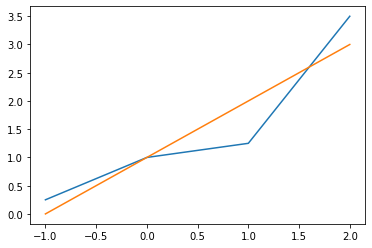

In [143]:
#We can illustrate it:
x = A[1]
plt.plot(x, y)
plt.plot(x, sum([A[i].dot(xfit[i]) for i in range(len(xfit))]))
plt.show()

In [144]:
#Note that we can obtain the best fit directly by using this:
AT = A.copy().transpose()
xfit = np.linalg.inv((A.dot(AT))).dot(y.dot(AT))
print(xfit)

[1. 1.]
